<h1><center> About the MNIST dataset</center></h1>

![](https://cdn-images-1.medium.com/max/1600/1*1TkgO9Zz6rC3KpAYNl5KfA.png)

<h1>What is the MNIST dataset?</h1>

The MNIST dataset(<b>M</b>odified <b>N</b>ational <b>I</b>nstitute of <b>S</b>tandards and <b>T</b>echnology database)is a large dataset containing images of handwritten digits, similar to the ones above. It's most commonly used for trainning image processing systems and algorithims. It's based on the <i>NIST</i> dataset and was edited to just be better in general. Some of these changes include the people who wrote the digits as well as normalizing a lot of the digits. The website for the dataset can be found [here](http://yann.lecun.com/exdb/mnist/).

# Details
* 60,000 training images and 10,000 testing images.
* Digits written by high school students and employees of the United States Census Bureau.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

<h1> 1. Unzip the files</h1>


The pictures of the numbers are stored as .idx files in a zipped folder. As such, we are going to have to figure out how to handle these files. We need to unzip the folders to get at the data inside as well as figuring out how we are going to read the numbers in a meaningful way. Let's start by unzipping the folders.

<b>WARNING</b>
The files required for this notebook are not included. You should create a folder called 'data' and drop the zip files from [here](http://yann.lecun.com/exdb/mnist/) into it.
<b>WARNING</b>

The following files are compressed using gzip. Fortunately, Python has a library to help us deal with these gzip files.

In [1]:
# Import gzip to unzip our files
import gzip

# Using gzip we just import, open the zip files contained in our data folder
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as file:
    file_content = file.read()  

# Print the first 4 elements of our file to make sure we're opening it properly
file_content[0:4]

b'\x00\x00\x08\x03'

<h1> 2. Read the IDX files</h1>


Now, to read the IDX files contained in the zipped folders, we can use a package 'idx2numpy' which will convert our idx files into a numpy array.

In [2]:
# Impor the Python image library
import PIL

# Import numpy as np
import numpy as np

# Import cv2 to save the image
import cv2

# Take an image from the .idx file found inside the zip file and reshapre into a
# 28x28 numpy array as unsigned 8 bit integer
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

Now let's show the image we just took from the .idx file so we can check to see if we are reading in the information properly. We can do this using matplotlib

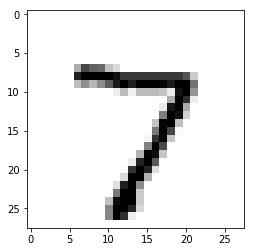

In [3]:
%matplotlib inline

# Import matplotlib so we can plot the image
import matplotlib.pyplot as plt

# Show tge image we created above
plt.imshow(image, cmap='gray')

Now that we know the image is being properly read in, we can save this image to the folder where out Python file is to also check that the files are being save properly.

In [4]:
# Import cv2 so we can use it to save the image we created above
import cv2

# Save the image with a name of 'firstImage' using cv2's imwrite function
cv2.imwrite('firstImage.png', image)

True

<h1> 3. Save the images</h1>

Now that we know how to properly handle the .idx files we need to figure out a way to read all of the images in the .idx file and not just the first one. We can do this by looping over the byes somehow..


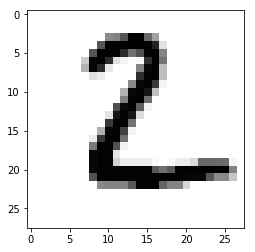

In [5]:
image = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

Here we are plotting the second image. We have done this as every 784 bytes after the first 16 bytes represents an image in the file.

ValueError: cannot reshape array of size 0 into shape (28,28)

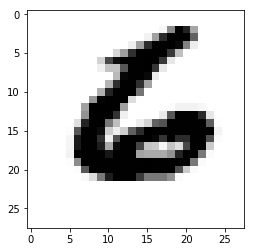

In [6]:
bytes1=16
interval=784

imageName="train-" + imageNumber + "-D"

bytes1=16
bytes2=800

for x in range(10000):
    image = ~np.array(list(file_content[bytes1:bytes2])).reshape(28,28).astype(np.uint8)
    bytes1+=784
    bytes2+=784
    cv2.imwrite(str(x) + 'png', image)